In [1]:
%matplotlib inline
import sys
sys.path.append("..")


# Build image pyramids


The ``pyramid_gaussian`` function takes an image and yields successive images
shrunk by a constant scale factor. Image pyramids are often used, e.g., to
implement algorithms for denoising, texture discrimination, and scale-invariant
detection.


<class 'numpy.ndarray'> (512, 512, 3)
(256, 256, 3)
256 256
(128, 128, 3)
128 128
(64, 64, 3)
64 64
(32, 32, 3)
32 32
(16, 16, 3)
16 16
(8, 8, 3)
8 8
(4, 4, 3)
4 4
(2, 2, 3)
2 2
(1, 1, 3)
1 1


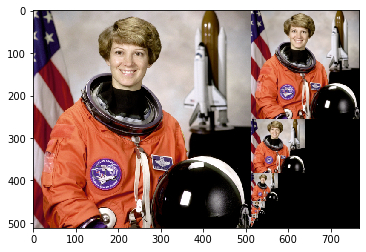

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
print(type(image), image.shape)
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

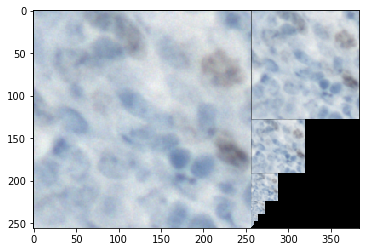

In [12]:
from util.reflect import init_data
from torchvision.transforms import ToPILImage

train_data = {
    "name": "torchvision.datasets.ImageFolder",
    "args": [
        "../data/c617a1/train"
    ],
    "transform": [
        {
            "name": "torchvision.transforms.ToTensor"
        }
    ],
    "dataloader_kwargs": {
        "batch_size": 128,
        "num_workers": 4,
        "shuffle": True
    }
}
train_set, train_loader = init_data(train_data)
image, _target = next(iter(train_set))
image = image.permute(1, 2, 0)  # move channel dimension to end
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)
composite_image[:rows, :cols, :] = pyramid[0]

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()